### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja["loja"] = "loja1"
loja2["loja"] = "loja2"
loja3["loja"] = "loja3"
loja4["loja"] = "loja4"

df = pd.concat([loja, loja2, loja3, loja4])

df["faturamento"] = (df["Preço"] + df["Frete"]).astype(int)


loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja1


#1. Análise do faturamento


Faturamento total por loja:
 loja
loja1    1615169
loja2    1566615
loja3    1540865
loja4    1457057
Name: faturamento, dtype: int64


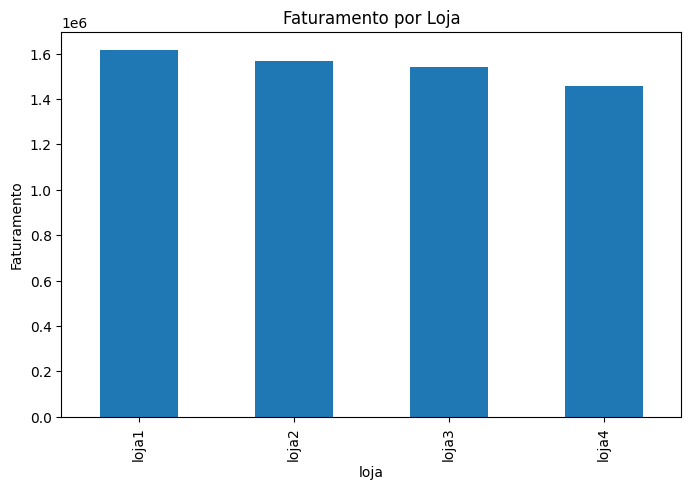

In [2]:

faturamento = df.groupby("loja")["faturamento"].sum().sort_values(ascending=False)
print("Faturamento total por loja:\n", faturamento)

faturamento.plot(kind="bar", figsize=(8,5), title="Faturamento por Loja")
plt.ylabel("Faturamento")
plt.show()


# 2. Vendas por Categoria


Vendas por categoria:
 Categoria do Produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: count, dtype: int64


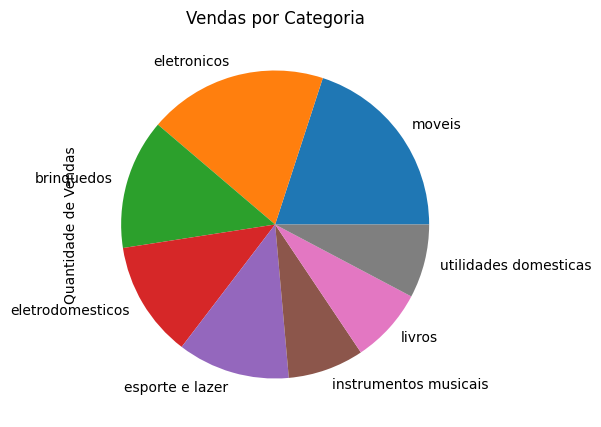

In [8]:
vendas_categoria = df["Categoria do Produto"].value_counts()
print("Vendas por categoria:\n", vendas_categoria)

vendas_categoria.plot(kind="pie", figsize=(8,5), title="Vendas por Categoria")
plt.ylabel("Quantidade de Vendas")
plt.show()



# 3. Média de Avaliação das Lojas

Média de avaliação das lojas:
 loja
loja3    4.048326
loja2    4.037304
loja4    3.995759
loja1    3.976685
Name: Avaliação da compra, dtype: float64


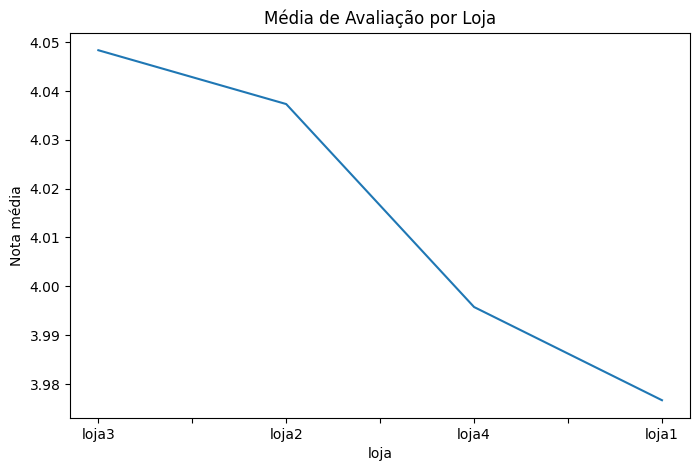

In [9]:
avaliação_media = df.groupby("loja")["Avaliação da compra"].mean().sort_values(ascending=False)
print("Média de avaliação das lojas:\n", avaliação_media)

avaliação_media.plot(kind="line", figsize=(8,5), title="Média de Avaliação por Loja")
plt.ylabel("Nota média")
plt.show()


# 4. Produtos Mais e Menos Vendidos

Top 10 produtos mais vendidos:
 Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64


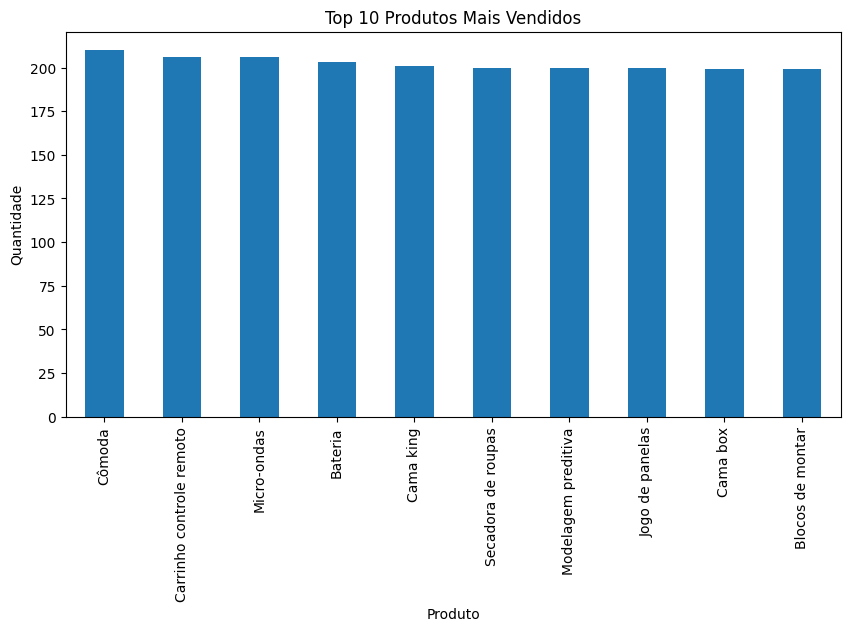

In [5]:
produtos_mais_vendidos = df["Produto"].value_counts().head(10)
print("Top 10 produtos mais vendidos:\n", produtos_mais_vendidos)

produtos_mais_vendidos.plot(kind="bar", figsize=(10,5), title="Top 10 Produtos Mais Vendidos")
plt.ylabel("Quantidade")
plt.show()


Top 10 produtos menos vendidos:
 Produto
Panela de pressão              172
Smartwatch                     172
Jogo de copos                  169
Poltrona                       168
Assistente virtual             167
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


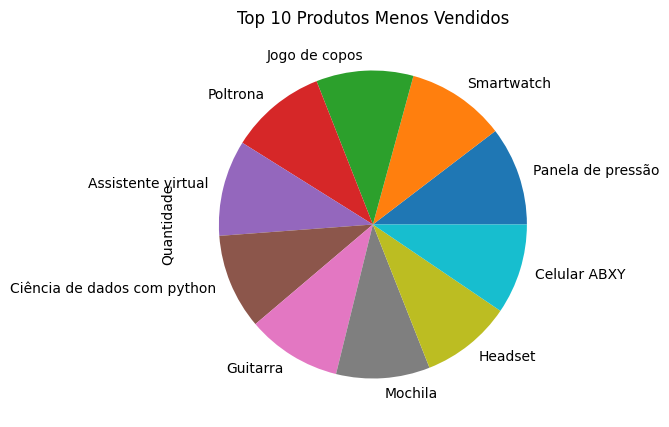

In [10]:
produtos_menos_vendidos = df["Produto"].value_counts().tail(10)
print("Top 10 produtos menos vendidos:\n", produtos_menos_vendidos)

produtos_menos_vendidos.plot(kind="pie", figsize=(10,5), title="Top 10 Produtos Menos Vendidos")
plt.ylabel("Quantidade")
plt.show()


# 5. Frete Médio por Loja


Frete médio por loja:
 loja
loja1    34.691805
loja2    33.621941
loja3    33.074464
loja4    31.278997
Name: Frete, dtype: float64


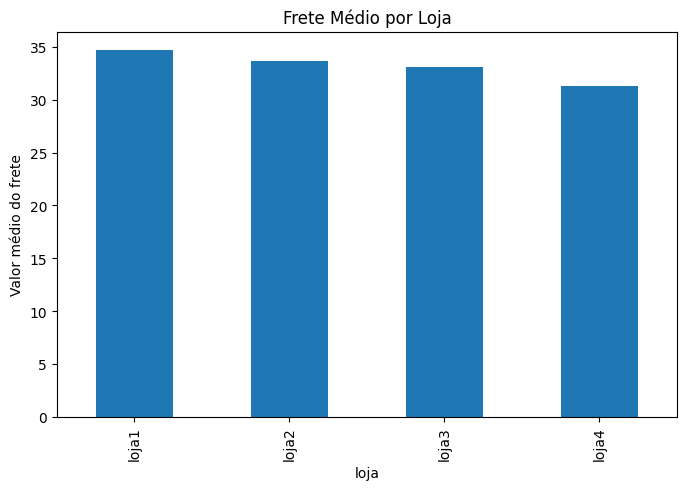

In [7]:
frete_medio = df.groupby("loja")["Frete"].mean().sort_values(ascending=False)
print("Frete médio por loja:\n", frete_medio)

frete_medio.plot(kind="bar", figsize=(8,5), title="Frete Médio por Loja")
plt.ylabel("Valor médio do frete")
plt.show()

Conclusão: A loja que apresenta menor eficiência e seria minha recomendação para ser vendida é a loja 4, isso pois, apresenta o menor faturamento total e não compensa isso em satisfação, já que sua avaliação média também não é destaque.